<a href="https://colab.research.google.com/github/RovilSurioJr/Numerical-Methods/blob/master/Solving_System_of_linear_equation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###QUESTION 1:

In the problem posed at the beginning of the section, John invested his inheritance of 12,000 dollars in three different funds: part in a money-market fund paying 3% interest annually; part in municipal bonds paying 4% annually; and the rest in mutual funds paying 7% annually. John invested 4,000 dollars more in mutual funds than he invested in municipal bonds. The total interest earned in one year was 670 dollars. How much did he invest in each type of fund?

$$\left[\begin{array}{ccc|c}
1&1&1&12000\\
0&-1&1&4000\\
0.03&0.04&0.07&670\\
\end{array}\right] \\ _{\text{(Standard bracketed form)}}$$

$$\begin{bmatrix}
1&1&1\\
0&-1&1\\
0.03&0.04&0.07\\
\end{bmatrix} \cdot
\begin{bmatrix}x\\y\\z\\\end{bmatrix}=
\begin{bmatrix}12000\\4000\\670\\\end{bmatrix}
\\ _{\text{(Linear Combination form)}}$$

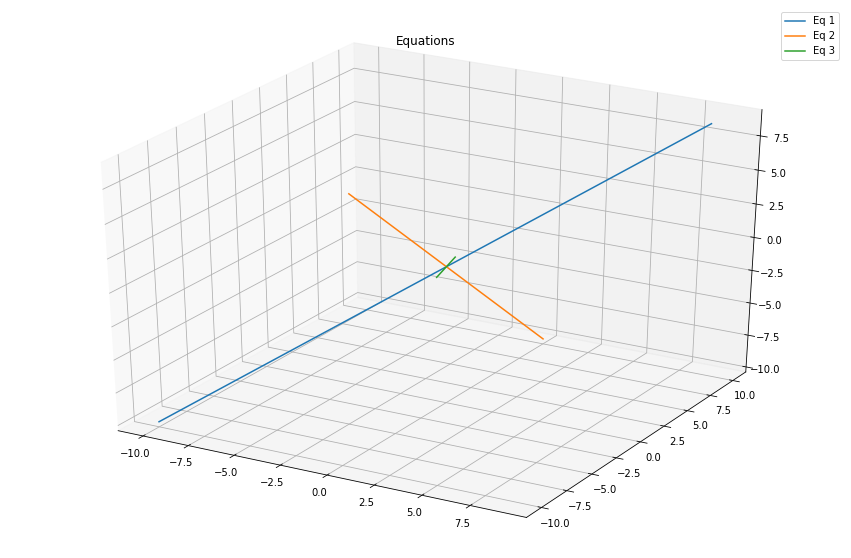

In [29]:
import numpy  as np
import matplotlib.pyplot as plt
X = np.array([[1, 1, 1],[0, -1, 1],[0.03, 0.04,0.07]],float)
b = np.array([12000, 4000, 670],float)

c = np.arange(-10,10,1)
equation1 = X[0]
equation2 = X[1]
equation3 = X[2]


fig = plt.figure(figsize = (15,10))
ax = fig.gca(projection='3d')

plt.title('Equations')

ax.plot(c*equation1[0],c*equation1[1],c*equation1[2], label = "Eq 1")
ax.plot(c*equation2[0],c*equation2[1],c*equation2[2], label = "Eq 2")
ax.plot(c*equation3[0],c*equation3[1],c*equation3[2], label = "Eq 3")

plt.grid()
plt.legend()
plt.show()

In [30]:
def gaussElim(X,b):
  n = len(b)
  v = np.empty(n)
  for k in range(0,n-1):
    if X[k, k] == 0:
        for j in range (n):
            X[k,j], X[k+1, j] = X[k+1, j], X[k,j]
        b[k], b[k+1] = b[k+1], b[k]
    for i in range(k+1, n):
        if X[i, k] != 0:
          fctr = X[k, k] / X[i, k]
          b[i] = b[k] - fctr*b[i]
          X[i,k+1:n] = X[k,k+1:n] - fctr*X[i,k+1:n]

  v[n-1] = b[n-1] / X[n-1, n-1]
  for i in range(n-2,-1,-1):
    v[i]= (b[i]- np.sum(X[i,i+1:n]*v[i+1:n]))/X[i,i]
    
  return v

In [31]:
X = np.array([[1, 1, 1],[0, -1, 1],[0.03, 0.04,0.07]],float)
b = np.array([12000, 4000, 670],float)
invest = gaussElim(X,b)

print('Invested in money-market fund with an amount of: ${:.2f}'.format(float(invest[0])))
print('Invested in municipal bonds with an amount of: ${:.2f}'.format(float(invest[1])))
print('Invested in mutual funds with an amount of: ${:.2f}'.format(float(invest[2])))


Invested in money-market fund with an amount of: $2000.00
Invested in municipal bonds with an amount of: $3000.00
Invested in mutual funds with an amount of: $7000.00


### References

[1] Lumen Learning College Algebra (2021). [***Systems of Linear Equations: Three Variables***](https://courses.lumenlearning.com/collegealgebra2017/chapter/introduction-systems-of-linear-equations-three-variables/)


